In [109]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.svm import SVC

# Set style
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (10, 6)


# Load Dataset Iris

In [110]:
df = pd.read_csv("../DATA/iris.csv")
print("Dataset Shape:", df.shape)
print("\nFirst 5 rows:")
df.head()


Dataset Shape: (150, 6)

First 5 rows:


,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


# Data Understanding

In [111]:
print("Dataset Info:")
print(df.info())
print("\n" + "=" * 50)
print("Statistical Summary:")
print(df.describe())
print("\n" + "=" * 50)
print("Missing Values:")
print(df.isnull().sum())
print("\n" + "=" * 50)
print("Duplicate Rows:", df.duplicated().sum())
print("\n" + "=" * 50)
print("Species Distribution:")
print(df['Species'].value_counts())


Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB
None

Statistical Summary:
               Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm
count  150.000000     150.000000    150.000000     150.000000    150.000000
mean    75.500000       5.843333      3.054000       3.758667      1.198667
std     43.445368       0.828066      0.433594       1.764420      0.763161
min      1.000000       4.300000      2.000000       1.000000      0.100000
25%     38.250000       5.100000      2.800000       1.600000

# Data Preprocessing

In [112]:
# Drop Id column
if 'Id' in df.columns:
    df = df.drop('Id', axis=1)

# Remove duplicates
df = df.drop_duplicates()

# Remove null values
df = df.dropna()

print(f"Dataset shape after cleaning: {df.shape}")


Dataset shape after cleaning: (147, 5)


# Exploratory Data Analysis (EDA)

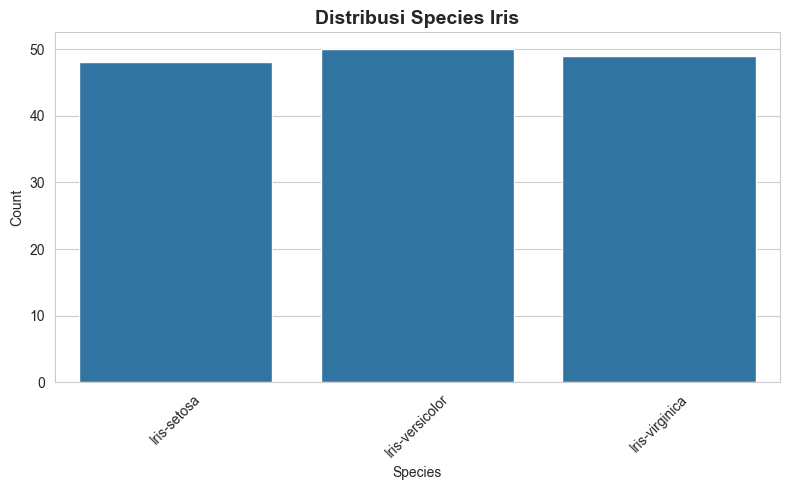

In [113]:
# Distribution of Species
import os

OUTPUT_DIR = "../REPORTS/OUTPUT"
os.makedirs(OUTPUT_DIR, exist_ok=True)

plt.figure(figsize=(8, 5))
sns.countplot(data=df, x='Species')
plt.title('Distribusi Species Iris', fontsize=14, fontweight='bold')
plt.xlabel('Species')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig(f"{OUTPUT_DIR}/01_species_distribution.png", dpi=300, bbox_inches='tight')
plt.show()


# Pairplot - Feature Relationships

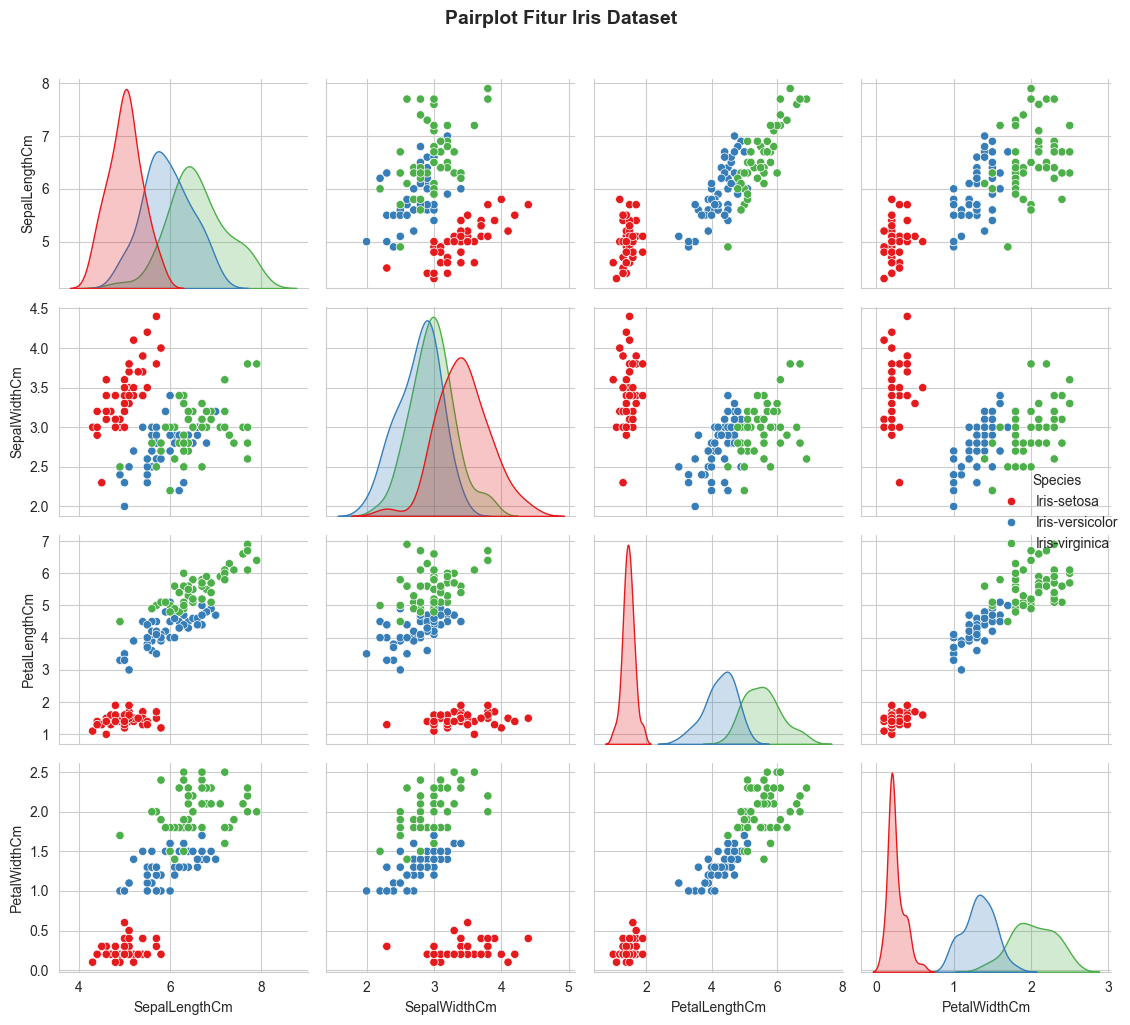

In [114]:
feature_cols = ['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']
sns.pairplot(df, hue='Species', vars=feature_cols, palette='Set1', diag_kind='kde')
plt.suptitle('Pairplot Fitur Iris Dataset', y=1.02, fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()


# Correlation Matrix

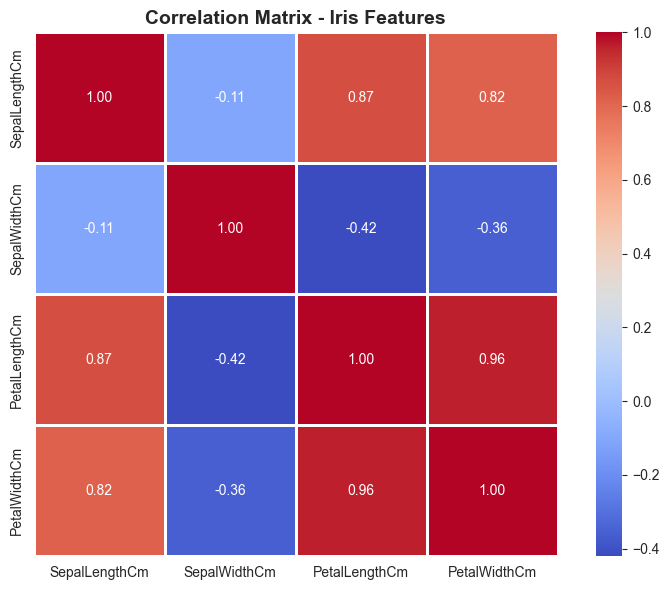

In [115]:
plt.figure(figsize=(8, 6))
correlation = df[feature_cols].corr()
sns.heatmap(correlation, annot=True, cmap='coolwarm', fmt='.2f', square=True, linewidths=1)
plt.title('Correlation Matrix - Iris Features', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.savefig(f"{OUTPUT_DIR}/02_correlation_matrix.png", dpi=300, bbox_inches='tight')
plt.show()


# Prepare Features and Target

In [116]:
X = df[feature_cols]
y = df['Species']

print("Features (X):", X.shape)
print("Target (y):", y.shape)
print("\nTarget classes:", y.unique())


Features (X): (147, 4)
Target (y): (147,)

Target classes: ['Iris-setosa' 'Iris-versicolor' 'Iris-virginica']


# Split Data (80% Training, 20% Testing)

In [117]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42,
    stratify=y
)

print(f"Training set: {len(X_train)} samples ({len(X_train) / len(df) * 100:.1f}%)")
print(f"Testing set: {len(X_test)} samples ({len(X_test) / len(df) * 100:.1f}%)")
print(f"\nTraining set distribution:\n{y_train.value_counts()}")
print(f"\nTesting set distribution:\n{y_test.value_counts()}")


Training set: 117 samples (79.6%)
Testing set: 30 samples (20.4%)

Training set distribution:
Species
Iris-versicolor    40
Iris-virginica     39
Iris-setosa        38
Name: count, dtype: int64

Testing set distribution:
Species
Iris-versicolor    10
Iris-virginica     10
Iris-setosa        10
Name: count, dtype: int64


# Create SVM

In [118]:
model = SVC(kernel='linear')
dt = model.fit(X_train, y_train)

In [119]:
y_train_pred = dt.predict(X_train)
train_accuracy = accuracy_score(y_train, y_train_pred)

print("=" * 60)
print("TRAINING SET EVALUATION")
print("=" * 60)
print(f"Accuracy: {train_accuracy * 100:.2f}%")
print("\nConfusion Matrix:")
print(confusion_matrix(y_train, y_train_pred))
print("\nClassification Report:")
print(classification_report(y_train, y_train_pred))


TRAINING SET EVALUATION
Accuracy: 98.29%

Confusion Matrix:
[[38  0  0]
 [ 0 38  2]
 [ 0  0 39]]

Classification Report:
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        38
Iris-versicolor       1.00      0.95      0.97        40
 Iris-virginica       0.95      1.00      0.97        39

       accuracy                           0.98       117
      macro avg       0.98      0.98      0.98       117
   weighted avg       0.98      0.98      0.98       117



# Model Evaluation - Testing Set

In [120]:
y_test_pred = dt.predict(X_test)
test_accuracy = accuracy_score(y_test, y_test_pred)

print("=" * 60)
print("TESTING SET EVALUATION")
print("=" * 60)
print(f"Accuracy: {test_accuracy * 100:.2f}%")
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_test_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_test_pred))


TESTING SET EVALUATION
Accuracy: 100.00%

Confusion Matrix:
[[10  0  0]
 [ 0 10  0]
 [ 0  0 10]]

Classification Report:
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        10
Iris-versicolor       1.00      1.00      1.00        10
 Iris-virginica       1.00      1.00      1.00        10

       accuracy                           1.00        30
      macro avg       1.00      1.00      1.00        30
   weighted avg       1.00      1.00      1.00        30



# Confusion Matrix Visualization

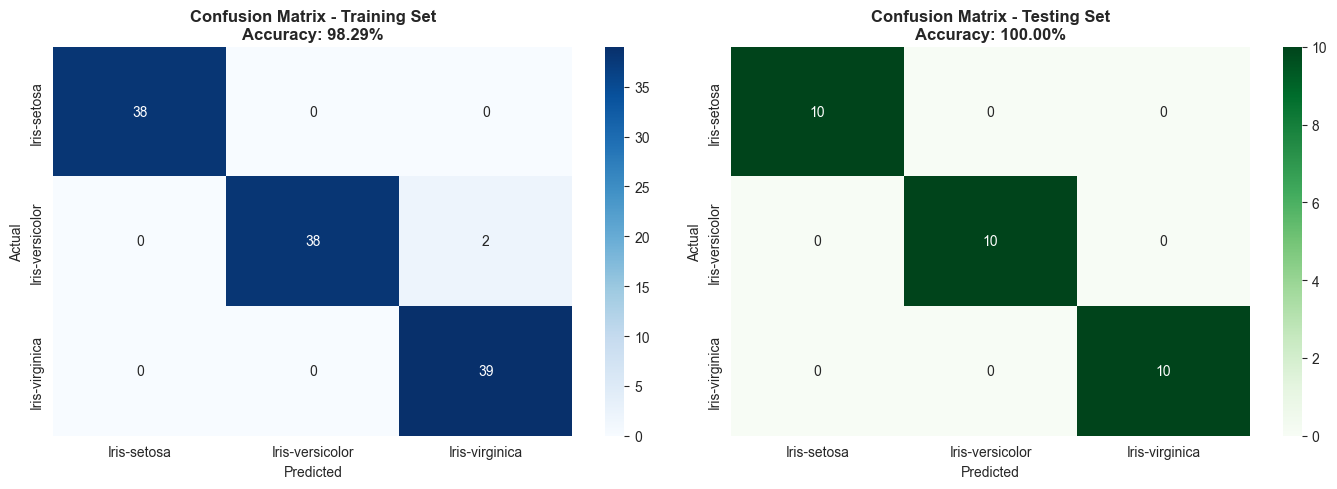

In [121]:
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Training Confusion Matrix
cm_train = confusion_matrix(y_train, y_train_pred)
sns.heatmap(cm_train, annot=True, fmt='d', cmap='Blues',
            xticklabels=dt.classes_,
            yticklabels=dt.classes_, ax=axes[0])
axes[0].set_title(f'Confusion Matrix - Training Set\nAccuracy: {train_accuracy * 100:.2f}%',
                  fontweight='bold')
axes[0].set_ylabel('Actual')
axes[0].set_xlabel('Predicted')

# Testing Confusion Matrix
cm_test = confusion_matrix(y_test, y_test_pred)
sns.heatmap(cm_test, annot=True, fmt='d', cmap='Greens',
            xticklabels=dt.classes_,
            yticklabels=dt.classes_, ax=axes[1])
axes[1].set_title(f'Confusion Matrix - Testing Set\nAccuracy: {test_accuracy * 100:.2f}%',
                  fontweight='bold')
axes[1].set_ylabel('Actual')
axes[1].set_xlabel('Predicted')

plt.tight_layout()
plt.savefig(f"{OUTPUT_DIR}/05_confusion_matrix.png", dpi=300, bbox_inches='tight')
plt.show()


# Visualize SVM Model

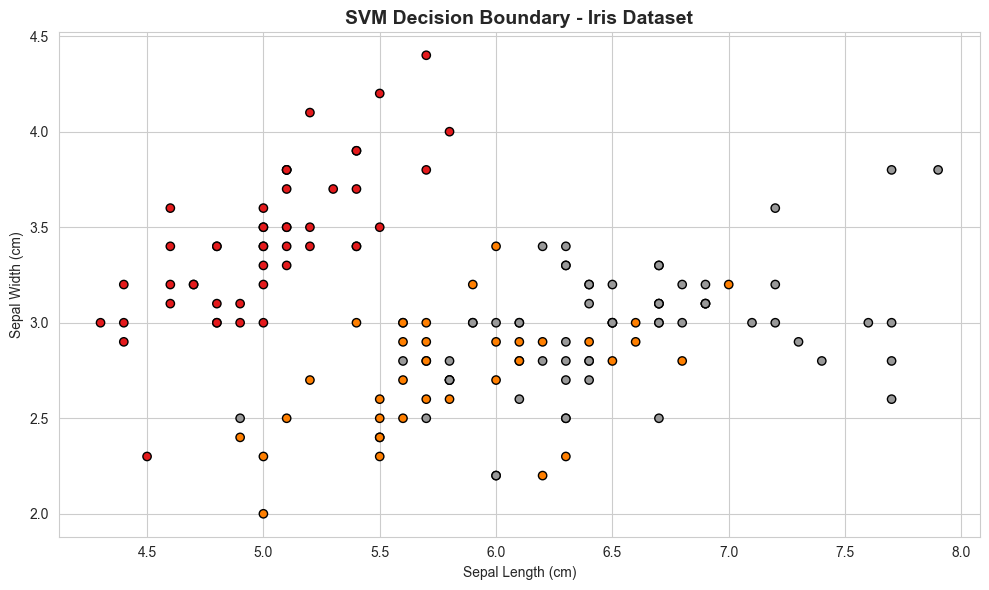

In [122]:
plt.scatter(df['SepalLengthCm'], df['SepalWidthCm'], c=df['Species'].astype('category').cat.codes, cmap='Set1',
            edgecolor='k')
plt.title('SVM Decision Boundary - Iris Dataset', fontsize=14, fontweight='bold')
plt.xlabel('Sepal Length (cm)')
plt.ylabel('Sepal Width (cm)')
plt.tight_layout()
plt.savefig(f"{OUTPUT_DIR}/07_svm_decision_boundary.png", dpi=300, bbox_inches='tight')
plt.show()

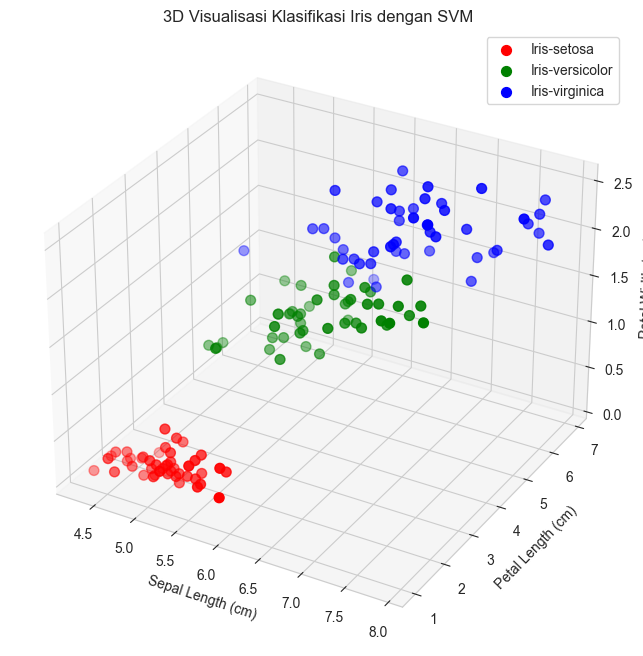

In [123]:

le = LabelEncoder()
df['SpeciesEncoded'] = le.fit_transform(df['Species'])

fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

colors = ['r', 'g', 'b']
labels = le.classes_

for i, species in enumerate(labels):
    subset = df[df['SpeciesEncoded'] == i]
    ax.scatter(
        subset['SepalLengthCm'],
        subset['PetalLengthCm'],
        subset['PetalWidthCm'],
        color=colors[i],
        label=species,
        s=50
    )

ax.set_xlabel('Sepal Length (cm)')
ax.set_ylabel('Petal Length (cm)')
ax.set_zlabel('Petal Width (cm)')
ax.set_title('3D Visualisasi Klasifikasi Iris dengan SVM')
ax.legend()
plt.show()

# Feature Importance

In [124]:
feature_importance = pd.DataFrame({
    'Feature': feature_cols,
    'Importance': dt.feature_importances_
}).sort_values('Importance', ascending=False)

print("Feature Importance:")
print(feature_importance)

plt.figure(figsize=(10, 6))
sns.barplot(data=feature_importance, x='Importance', y='Feature')
plt.title('Feature Importance - Decision Tree', fontsize=14, fontweight='bold')
plt.xlabel('Importance Score')
plt.ylabel('Features')
plt.tight_layout()
plt.savefig(f"{OUTPUT_DIR}/06_feature_importance.png", dpi=300, bbox_inches='tight')
plt.show()


AttributeError: 'SVC' object has no attribute 'feature_importances_'

# Summary Results

In [125]:
summary = pd.DataFrame({
    'Metric': ['Accuracy'],
    'Training': [f"{train_accuracy * 100:.2f}%"],
    'Testing': [f"{test_accuracy * 100:.2f}%"]
})

print("\n" + "=" * 70)
print("MODEL SUMMARY")
print("=" * 70)
print(summary.to_string(index=False))
print("=" * 70)



MODEL SUMMARY
  Metric Training Testing
Accuracy   98.29% 100.00%
